In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [3]:
# HELPER FUNCTIONS

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[0], origin[1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)

# 1. Numpy Part 1
+ tốc dộ xử lý nhanh

In [4]:
listA = np.array([1, 2, 3])
print(listA)
print(listA.dtype)

[1 2 3]
int32


#### Đo tốc độ sử lý của numpy
+ tốc độ xử lý nhanh hơn list bình thường

In [5]:
n = 1000000

In [6]:
some_list = [1]*n 

In [7]:
%%time
for i in range(n):
    some_list[i]+=1

CPU times: total: 46.9 ms
Wall time: 163 ms


In [8]:
np_array = np.ones(n)

In [9]:
%%time
np_array += 1

# => list = 361 ms
# => numpy 1.4 ms

CPU times: total: 0 ns
Wall time: 4 ms


## 1.1. Basics

<div align="left">
<img src="https://i.imgur.com/VSCCjUx.png" width="650">
</div>

In [10]:
x = np.array([
    [1, 3, 5],
    [1, 3, 5],
])

# Số chiều của vector
print ("x ndim: ", x.ndim)

# kích thước của mảng theo mỗi chiều
print ("x shape:", x.shape)

# số phần tử
print ("x size: ", x.size)

# kiểu dữ liệu
print ("x dtype: ", x.dtype)

x ndim:  2
x shape: (2, 3)
x size:  6
x dtype:  int32


## 1.2. Vector
Vectơ là một đoạn thẳng có hướng

$$
\vec{v} = \begin{pmatrix} v_1 \\ v_2 \\ \dots \\ v_n \end{pmatrix}
$$

In [11]:
x = np.array([3,4])
print('ndim: ', x.ndim)
print('shape: ', x.shape)
print('size: ', x.size)
print('type: ', x.dtype)

ndim:  1
shape:  (2,)
size:  2
type:  int32


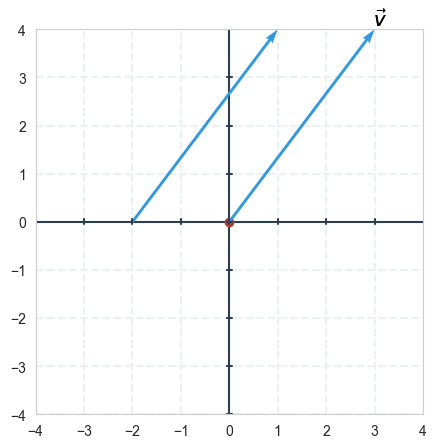

In [12]:
#Vẽ vector
plt.figure(figsize=(5, 5))

draw_vectors(
    np.array([x]),
    origin= np.array([-2,0]),
    labels=[r'$\vec{v}$']
)

draw_vectors(
    np.array([x]),
    labels=[r'$\vec{v}$']
)

draw_grid()

plt.show()

+ Notation: Length of $\vec{v}$ = ||v||

In [13]:
np.sqrt(x[0]**2 + x[1]**2)

5.0

In [14]:
np.linalg.norm(x)

5.0

#### **Scalar multiplication (phép nhân một vector bởi một scalar(hằng số) )**

phép nhân một vector bởi một hằng số là một vector

$$
a\vec{v} = a \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} =
\begin{pmatrix} av_1 \\ av_2 \end{pmatrix} 
$$

Ví dụ
$$
2\vec{v} = 2 \begin{pmatrix} 3 \\ 4 \end{pmatrix} =
\begin{pmatrix} 2 * 3 \\ 2 * 4 \end{pmatrix} =
\begin{pmatrix} 6 \\ 8 \end{pmatrix} 
$$

In [15]:
v = np.array([3, 4])
a = 2

av = a*v
av

array([6, 8])

#### **Addition (cộng vector)**

$$
\vec{x} + \vec{y} = 
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} 
+
\begin{pmatrix} y_1 \\ y_2 \end{pmatrix}
=
\begin{pmatrix} x_1 + y_1 \\ x_2 + y_2 \end{pmatrix}
$$

In [16]:
x = np.array([1, 2])
y = np.array([-2, 1])

z = x + y

z

array([-1,  3])

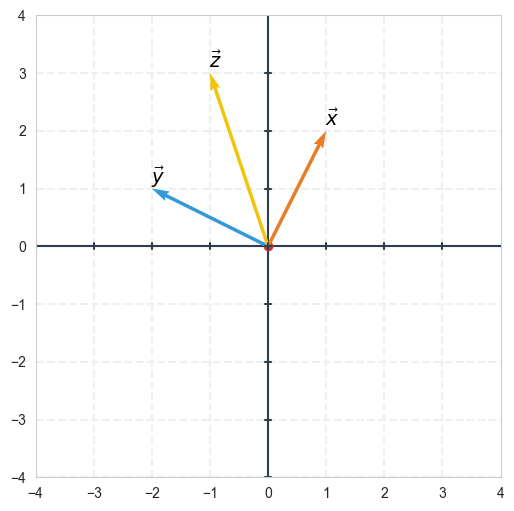

In [17]:
plt.figure(figsize=(6, 6))
draw_grid()
draw_vectors(
    np.array([y, x, z]), 
    labels=[r'$\vec{y}$', r'$\vec{x}$', r'$\vec{z}$']
)
plt.show()

#### **Dot product (tích vô hướng)**

$$
\vec{a}.\vec{b} = \sum_{i}^{n}{a_ib_i} = ||a||.||b||.cos\phi
$$

+ Tích vô hướng
    - lớn hơn 0: cùng chiều với nhau
    - bằng 0: Vuông góc với nhau
    - Nhỏ hơn 0: Không cùng chiều

In [18]:
a = np.array([2, 3])
b = np.array([4, 3])

In [19]:
(a[0] * b[0]) + (a[1] * b[1])

17

In [20]:
np.dot(a, b)

17

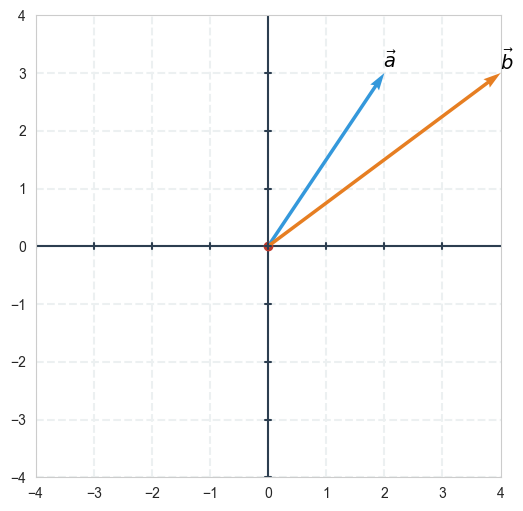

In [21]:
plt.figure(figsize=(6, 6))

draw_grid()
draw_vectors(
    np.array([a, b]),
    labels=[r'$\vec{a}$', r'$\vec{b}$']
)

plt.show()

#### **Hadamard product**

+ là một vector

In [22]:
np.array([a[0] * b[0], a[1] * b[1]])

array([8, 9])

In [23]:
a * b

array([8, 9])

## 1.3. Matrix

<div align="left">
<img src="https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/images/foundations/numpy/dot.gif" width="450">
</div>

In [117]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

b = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
])

In [111]:
a @ b

array([[ 58,  64],
       [139, 154]])

In [112]:
b @ a

array([[ 39,  54,  69],
       [ 49,  68,  87],
       [ 59,  82, 105]])

## 1.4 Dimensional Tensor

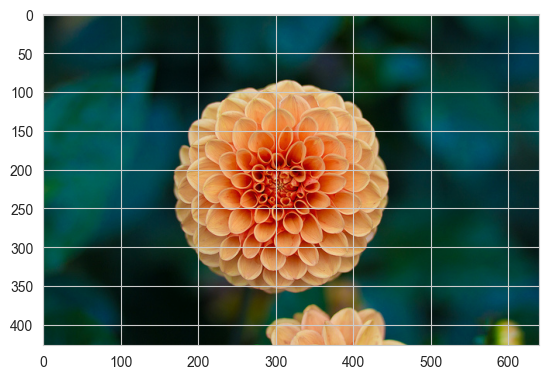

In [121]:
from sklearn.datasets import load_sample_image

img = load_sample_image('flower.jpg')

plt.imshow(img)
plt.show()

In [140]:
np.ones(shape=(2, 4, 3), dtype='int64')

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=int64)